In [114]:
import sys
sys.path.append('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/LyA/commands')
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/data_loader')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from readTrc_4CH import Trc
import time
from LyAdata24 import read_df

In [241]:
df = pd.read_csv('/eos/experiment/gbar/datasummary/datafile24.txt', delimiter = '\t')
df = df[[True if val in ['24_07_06', '24_07_07', '24_07_08'] else False for val in df.Date]]
#df = df[df.run == 619]
fl = list(df['MCP5'])
cm = list(df['CMOS_Tracker'])
wf = list(df['Waveform_12bit'])

In [242]:
len([1 for val in fl if val != 'None']), len([1 for val in wf if val != 'None']), len([1 for val in cm if val != 'None'])

(648, 689, 322)

In [249]:
[val for val in fl if len(val) == 83]

['/eos/experiment/gbar/pgunpc/data/24_07_06/PCO-SwY_exp_10_us_1720246569.628.dark.tif',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/PCO-SwY_exp_10_us_1720246680.590.dark.tif',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/PCO-SwY_exp_10_us_1720246791.609.dark.tif',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/PCO-SwY_exp_10_us_1720246905.594.dark.tif',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/PCO-SwY_exp_10_us_1720247026.818.dark.tif',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/PCO-SwY_exp_10_us_1720247142.584.dark.tif',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/PCO-SwY_exp_10_us_1720247258.973.dark.tif',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/PCO-SwY_exp_10_us_1720247388.588.dark.tif',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/PCO-SwY_exp_10_us_1720247502.648.dark.tif',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/PCO-SwY_exp_10_us_1720247618.478.dark.tif',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/PCO-SwY_exp_10_us_1720247748.641.dark.tif',
 '/eos/experiment/gbar/pgunpc/da

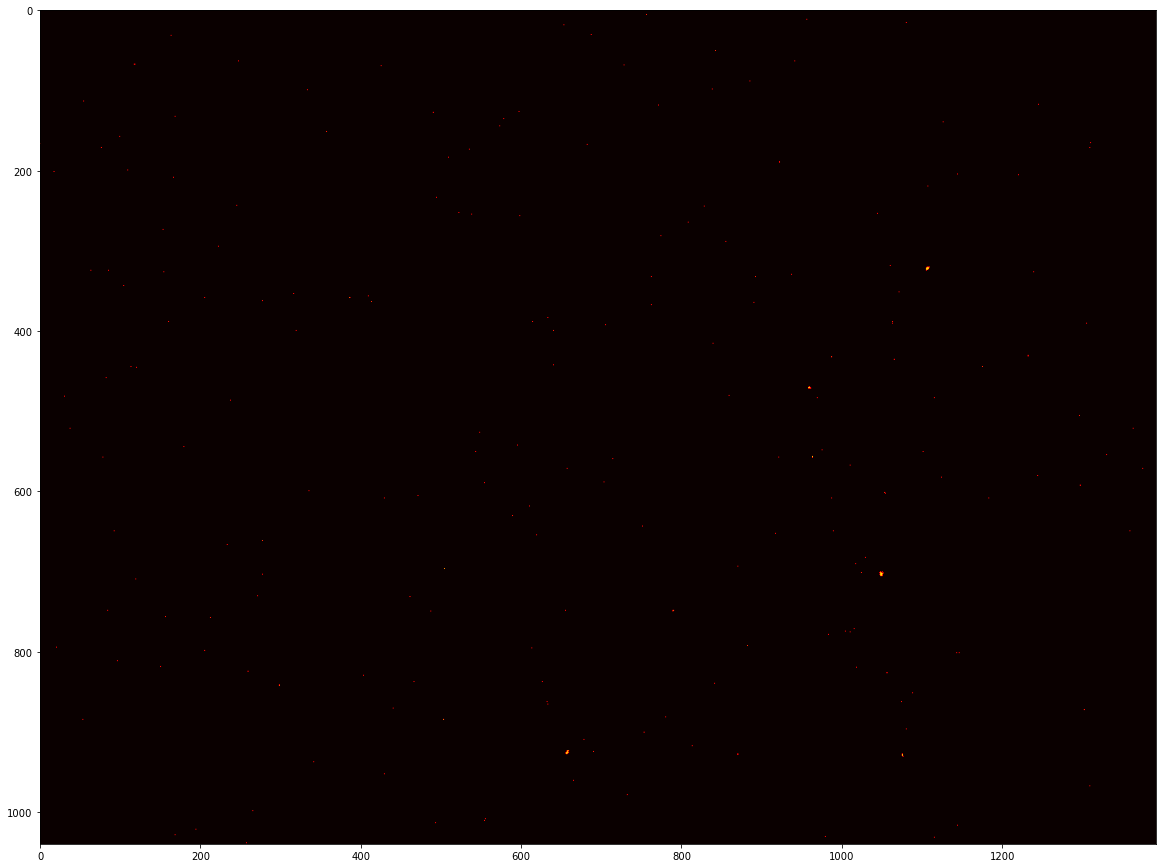

In [256]:
pos = -1

fig = plt.figure(figsize = (20,20))
Im = Image.open(fl[pos])
arr = np.array(Im)
thresh = np.average(arr) + 4*np.std(arr)
arr[arr < thresh] = 0
arr[arr > 1500] = 1500
plt.imshow(arr, cmap = 'hot')

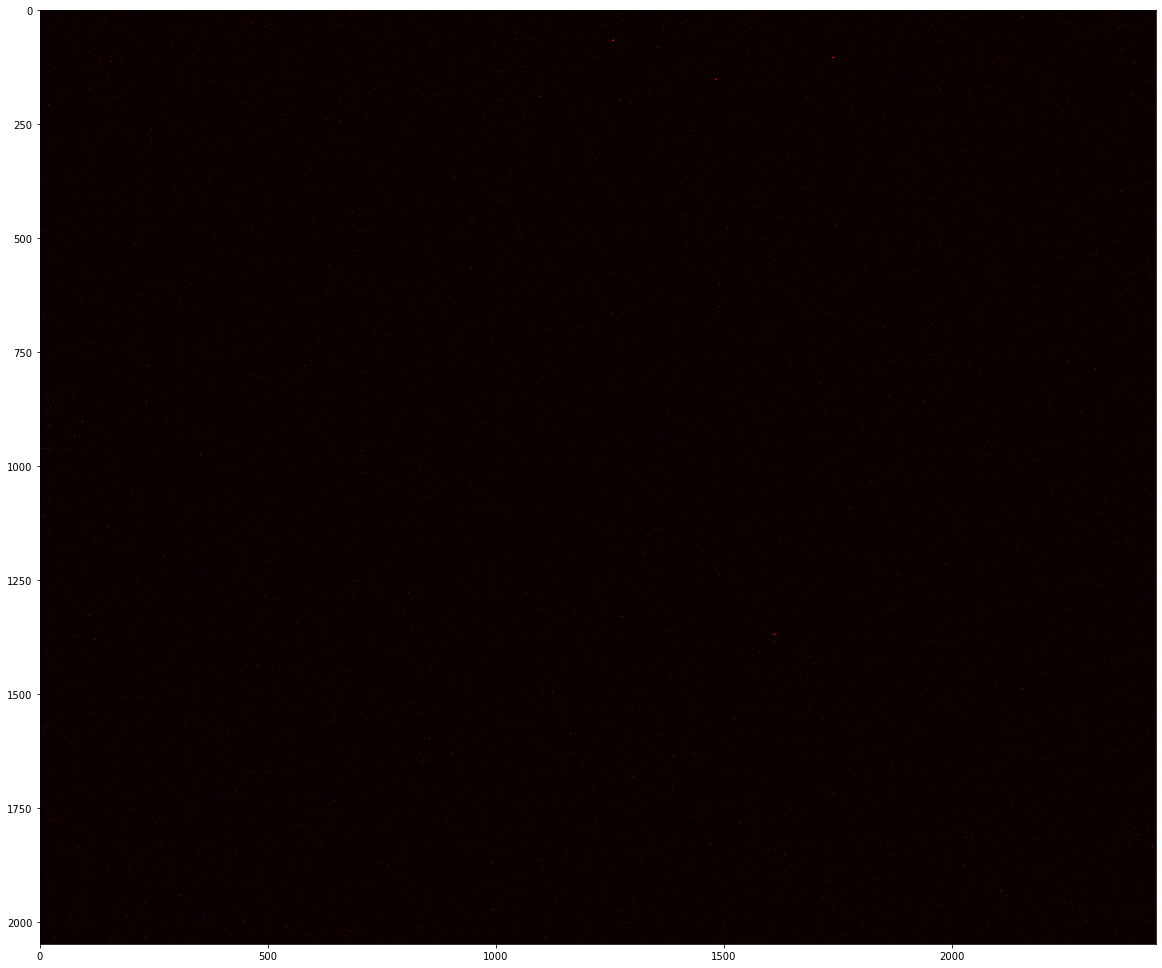

In [267]:
cm = [val for val in cm if val != 'None']
pos = 71

fig = plt.figure(figsize = (20,20))
Im = Image.open(cm[pos])
arr = np.array(Im)
thresh = np.average(arr) + 4*np.std(arr)
arr[arr < thresh] = 0
arr[arr > 200] = 150
plt.imshow(arr, cmap = 'hot')

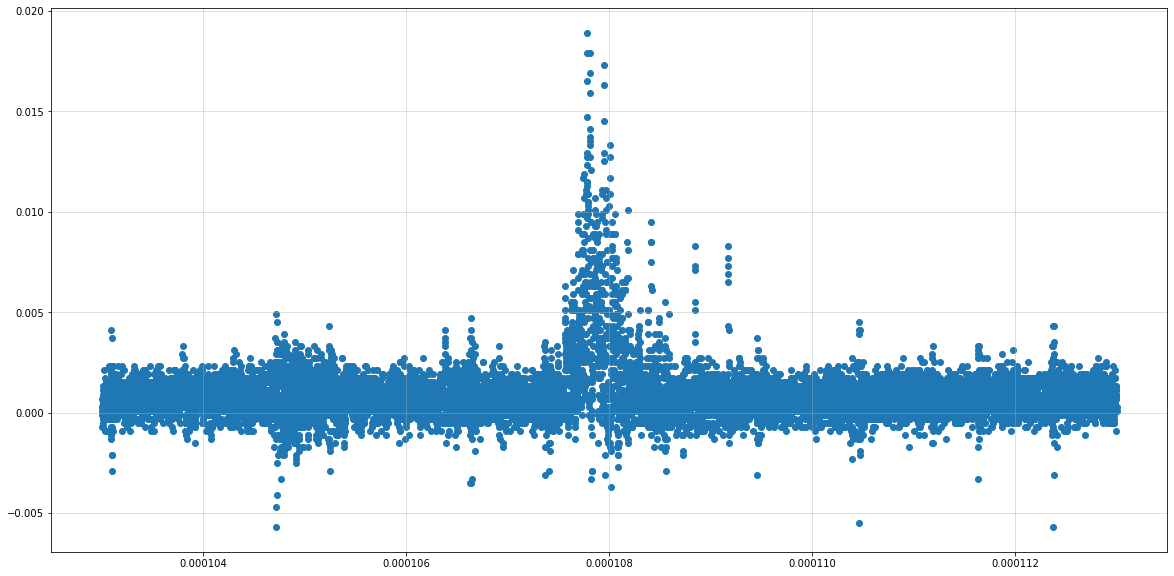

In [215]:
data = Trc().open(wf[pos])
wx = data[0][2]
wy = data[1][2]

fig = plt.figure(figsize = (20,10))
plt.grid(alpha = 0.5)
plt.scatter(wx, wy)

In [120]:
data

([array([0.000103, 0.000103, 0.000103, ..., 0.000113, 0.000113, 0.000113]),
  array([0.000103, 0.000103, 0.000103, ..., 0.000113, 0.000113, 0.000113]),
  array([0.000103, 0.000103, 0.000103, ..., 0.000113, 0.000113, 0.000113]),
  array([0.000103, 0.000103, 0.000103, ..., 0.000113, 0.000113, 0.000113])],
 [array([-0.00699992, -0.00599992, -0.00699992, ..., -0.02399992,
         -0.02199992, -0.01999992]),
  array([-0.00150001, -0.00130001, -0.00110001, ..., -0.00110001,
         -0.00130001, -0.00030001]),
  array([ 3.00019121e-04,  9.00019106e-04, -2.99980864e-04, ...,
          2.30001907e-03,  7.00019111e-04, -9.99808690e-05]),
  array([-5.99992624e-03,  5.00007428e-03, -4.99992620e-03, ...,
          1.00007409e-03, -8.99992639e-03,  7.40401447e-08])],
 [{'INSTRUMENT_NAME': 'LECROYHDO6104A',
   'INSTRUMENT_NUMBER': 51454,
   'TRACE_LABEL': '',
   'WAVE_ARRAY_COUNT': 12502,
   'PNTS_PER_SCREEN': 12500,
   'FIRST_VALID_PNT': 0,
   'LAST_VALID_PNT': 12501,
   'FIRST_POINT': 0,
   'SPAR